# EM-DAT Exploratory Data Analysis

CSCI 4622 | Team Disaster

This notebook is resposible for the cleanup process for the EM-DAT database. 

In [1]:
# Import necessary libraries for Data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***

## Exploratory Data Analysis (EDA)

In [2]:
# Load the dataset
data = pd.read_csv("./data/emdat_2020-2024_cleaned.csv")
# data.head()

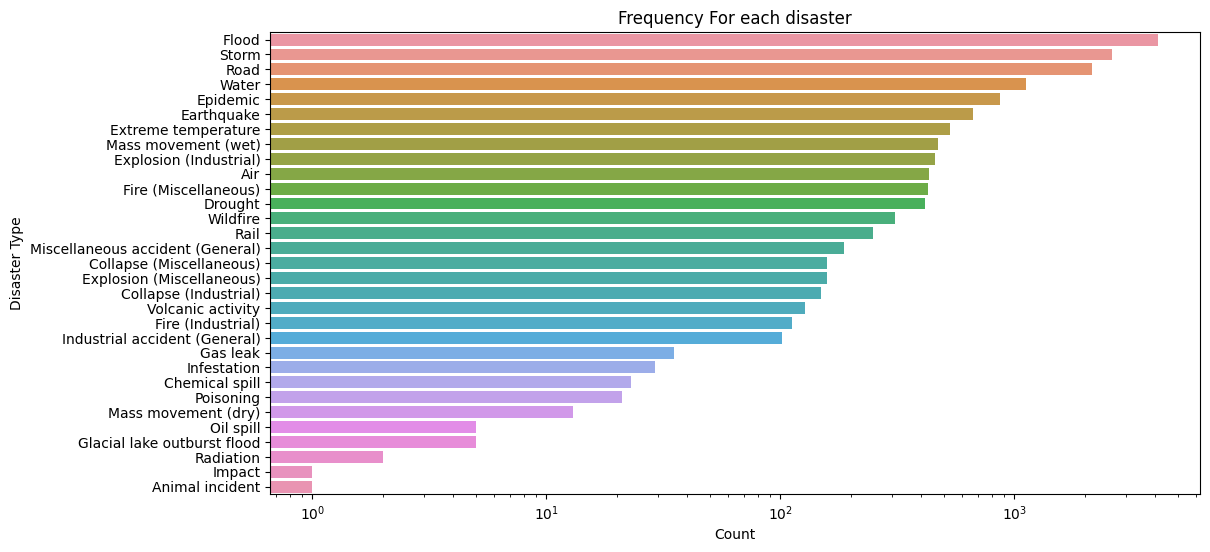

In [3]:
# Create a Frequency chart for Disaster Type
plt.figure(figsize=(12, 6))
sns.countplot(y='Disaster Type', data=data, order=data['Disaster Type'].value_counts().index)

plt.title('Frequency For each disaster')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
# Use a logarithmic scale for plotting
plt.xscale('log')  
plt.show()

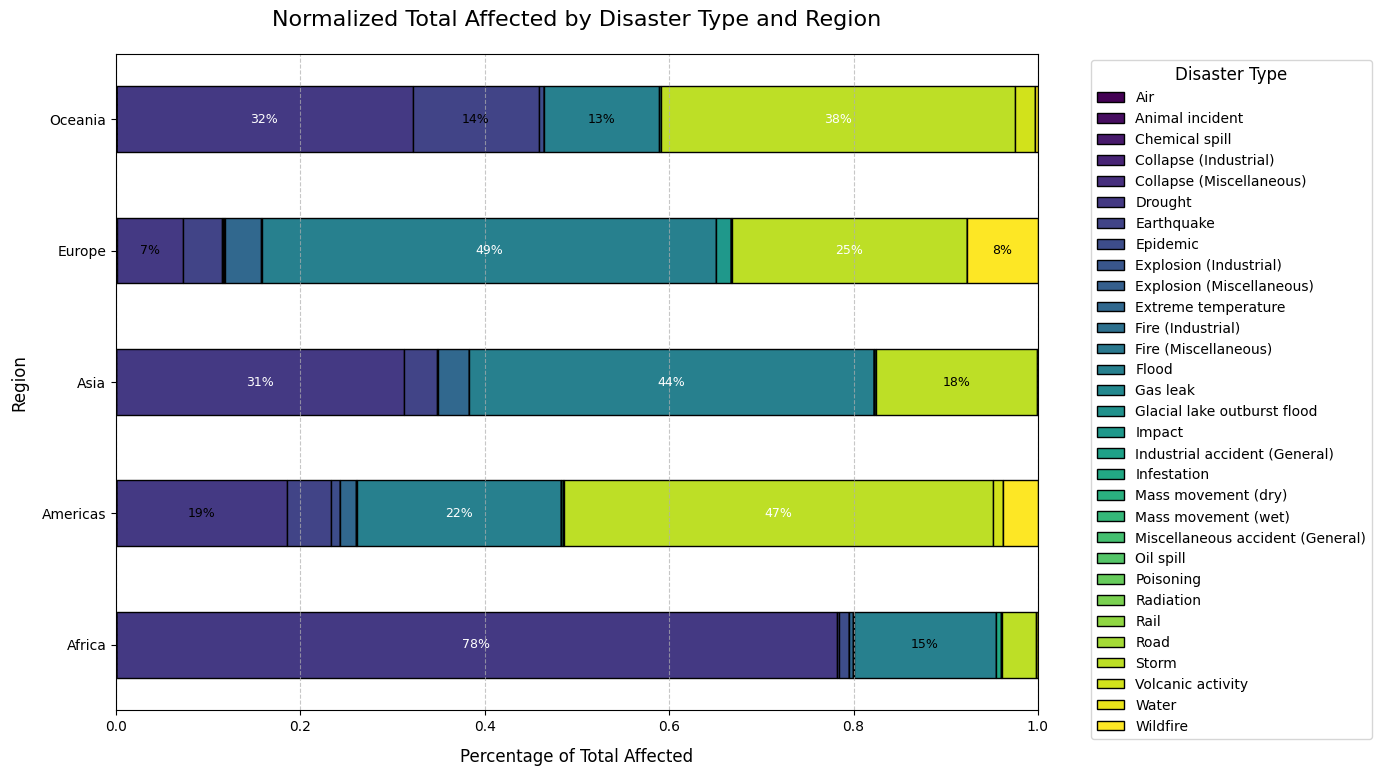

In [4]:
# Plot: Total Affected by Disaster Type and Region

# Group by region and disaster type, summing the total affected population
impact_by_region = data.groupby(['Region', 'Disaster Type'])['Total Affected'].sum().unstack(fill_value=0)

# Normalize the impact data by region
normalized_impact = impact_by_region.div(impact_by_region.sum(axis=1), axis=0)

# Create a stacked bar plot for vizz 
fig, ax = plt.subplots(figsize=(14, 8))
normalized_impact.plot(
    kind='barh',
    stacked=True,
    colormap='viridis',
    ax=ax,
    # Add edge color for clarity
    edgecolor='black' 
)

# Naming the plot
ax.set_title('Normalized Total Affected by Disaster Type and Region', fontsize=16, pad=20)
ax.set_xlabel('Percentage of Total Affected', fontsize=12, labelpad=10)
ax.set_ylabel('Region', fontsize=12, labelpad=10)
# Since data is normalized, x-axis should range from 0 to 1
ax.set_xlim(0, 1) 
ax.tick_params(axis='both', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7) 

# Add percentage labels inside the bars for readability
for i in range(len(normalized_impact)):
    row_data = normalized_impact.iloc[i]
    cumulative = 0
    for j, value in enumerate(row_data):
        # Only label segments large enough to display
        if value > 0.05:  
            ax.text(
                cumulative + value / 2,
                i,
                f"{value:.0%}",
                ha='center',
                va='center',
                fontsize=9,
                color='white' if value > 0.2 else 'black'
            )
        cumulative += value

# Adjust layout
ax.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
fig.tight_layout()
plt.show()

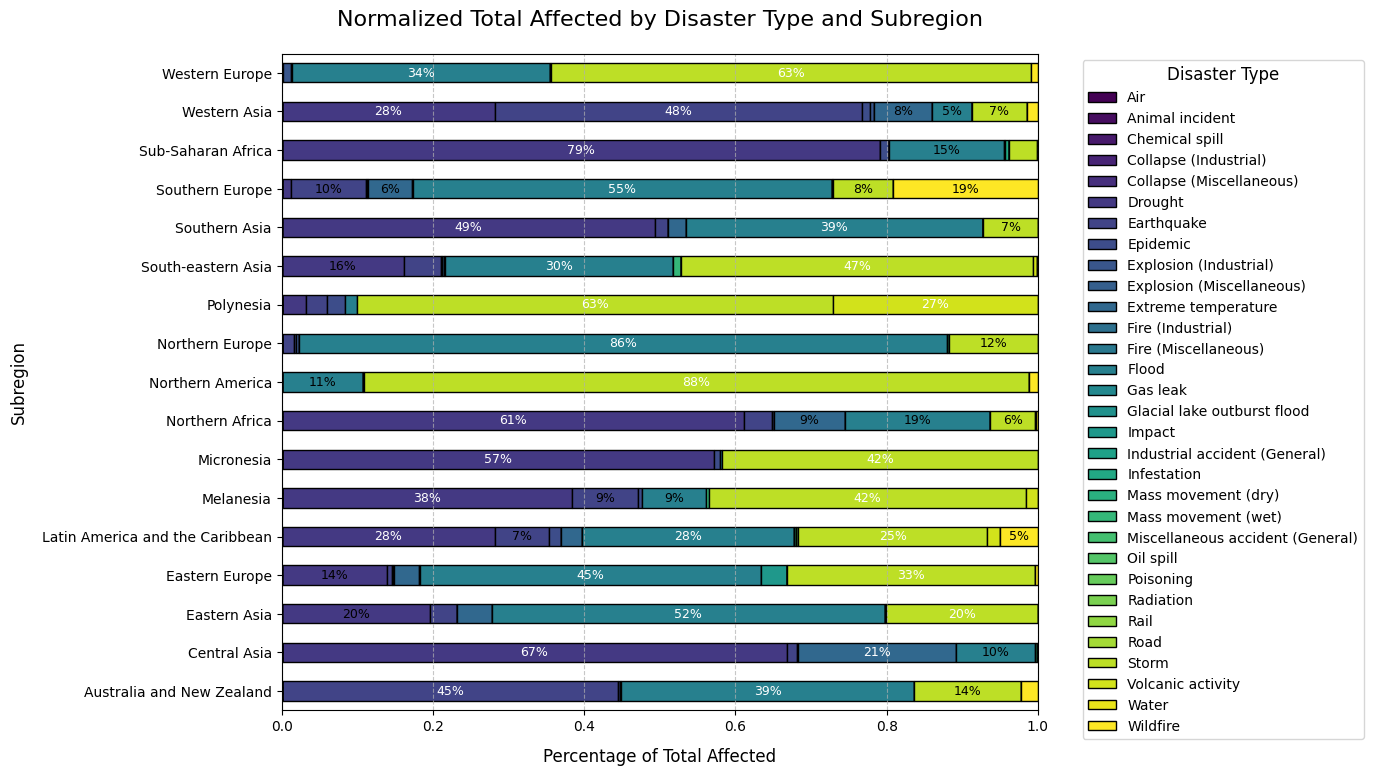

In [5]:
# Plot: Total Affected by Disaster Type and Subregion

# Group by region and disaster type, summing the total affected population
impact_by_region = data.groupby(['Subregion', 'Disaster Type'])['Total Affected'].sum().unstack(fill_value=0)

# Normalize the impact data by region
normalized_impact = impact_by_region.div(impact_by_region.sum(axis=1), axis=0)

# Create a stacked bar plot for vizz 
fig, ax = plt.subplots(figsize=(14, 8))
normalized_impact.plot(
    kind='barh',
    stacked=True,
    colormap='viridis',
    ax=ax,
    # Add edge color for clarity
    edgecolor='black' 
)

# Naming the plot
ax.set_title('Normalized Total Affected by Disaster Type and Subregion', fontsize=16, pad=20)
ax.set_xlabel('Percentage of Total Affected', fontsize=12, labelpad=10)
ax.set_ylabel('Subregion', fontsize=12, labelpad=10)
# Since data is normalized, x-axis should range from 0 to 1
ax.set_xlim(0, 1) 
ax.tick_params(axis='both', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7) 

# Add percentage labels inside the bars for readability
for i in range(len(normalized_impact)):
    row_data = normalized_impact.iloc[i]
    cumulative = 0
    for j, value in enumerate(row_data):
        # Only label segments large enough to display
        if value > 0.05:  
            ax.text(
                cumulative + value / 2,
                i,
                f"{value:.0%}",
                ha='center',
                va='center',
                fontsize=9,
                color='white' if value > 0.2 else 'black'
            )
        cumulative += value

# Adjust layout
ax.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
fig.tight_layout()
plt.show()

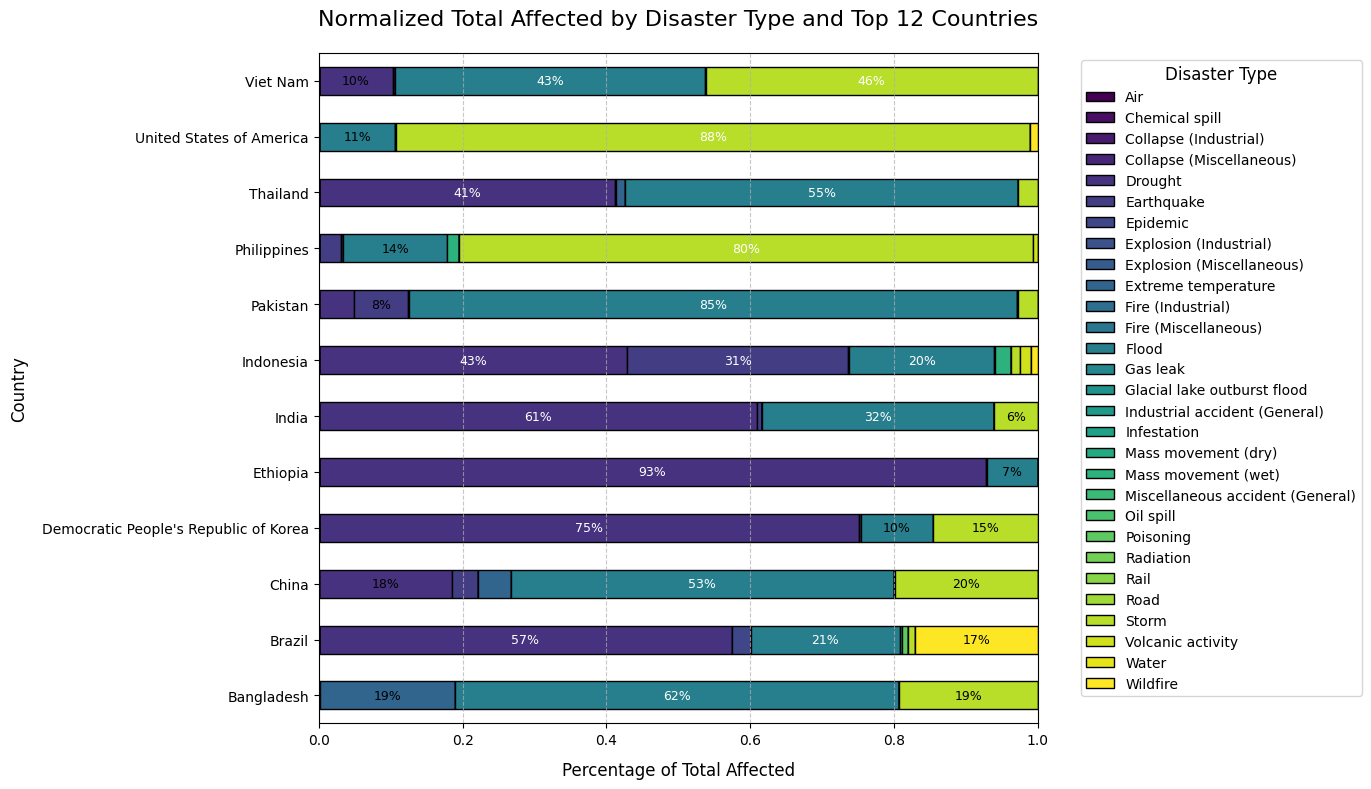

In [6]:
# Plot: Normalized Total Affected by Disaster Type and Top 12 Countries

# Sum the total affected by Country
total_affected_by_country = data.groupby('Country')['Total Affected'].sum()

# Select the top 12 countries with the most affected people
top_10_countries = total_affected_by_country.nlargest(12).index

# Filter the dataset to include only the top 12 countries
filtered_data_by_country = data[data['Country'].isin(top_10_countries)]

# Same as above: 

# Group by Country and Disaster Type, summing the total affected population
impact_by_top_countries = filtered_data_by_country.groupby(['Country', 'Disaster Type'])['Total Affected'].sum().unstack(fill_value=0)

# Normalize the impact data by Country
normalized_impact_countries = impact_by_top_countries.div(impact_by_top_countries.sum(axis=1), axis=0)

# Create a stacked horizontal bar plot for the top 10 countries
fig, ax = plt.subplots(figsize=(14, 8))
normalized_impact_countries.plot(
    kind='barh',
    stacked=True,
    colormap='viridis',
    ax=ax,
    edgecolor='black'  
)

# Set plot title and axis labels
ax.set_title('Normalized Total Affected by Disaster Type and Top 12 Countries', fontsize=16, pad=20)
ax.set_xlabel('Percentage of Total Affected', fontsize=12, labelpad=10)
ax.set_ylabel('Country', fontsize=12, labelpad=10)
ax.set_xlim(0, 1)  # Since data is normalized, x-axis should range from 0 to 1
ax.tick_params(axis='both', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels inside the bars for readability
for i in range(len(normalized_impact_countries)):
    row_data = normalized_impact_countries.iloc[i]
    cumulative = 0
    for j, value in enumerate(row_data):
        if value > 0.05:  # Only label segments large enough to display
            ax.text(
                cumulative + value / 2,
                i,
                f"{value:.0%}",
                ha='center',
                va='center',
                fontsize=9,
                color='white' if value > 0.2 else 'black'
            )
        cumulative += value

# Adjust legend and layout
ax.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
fig.tight_layout()
plt.show()

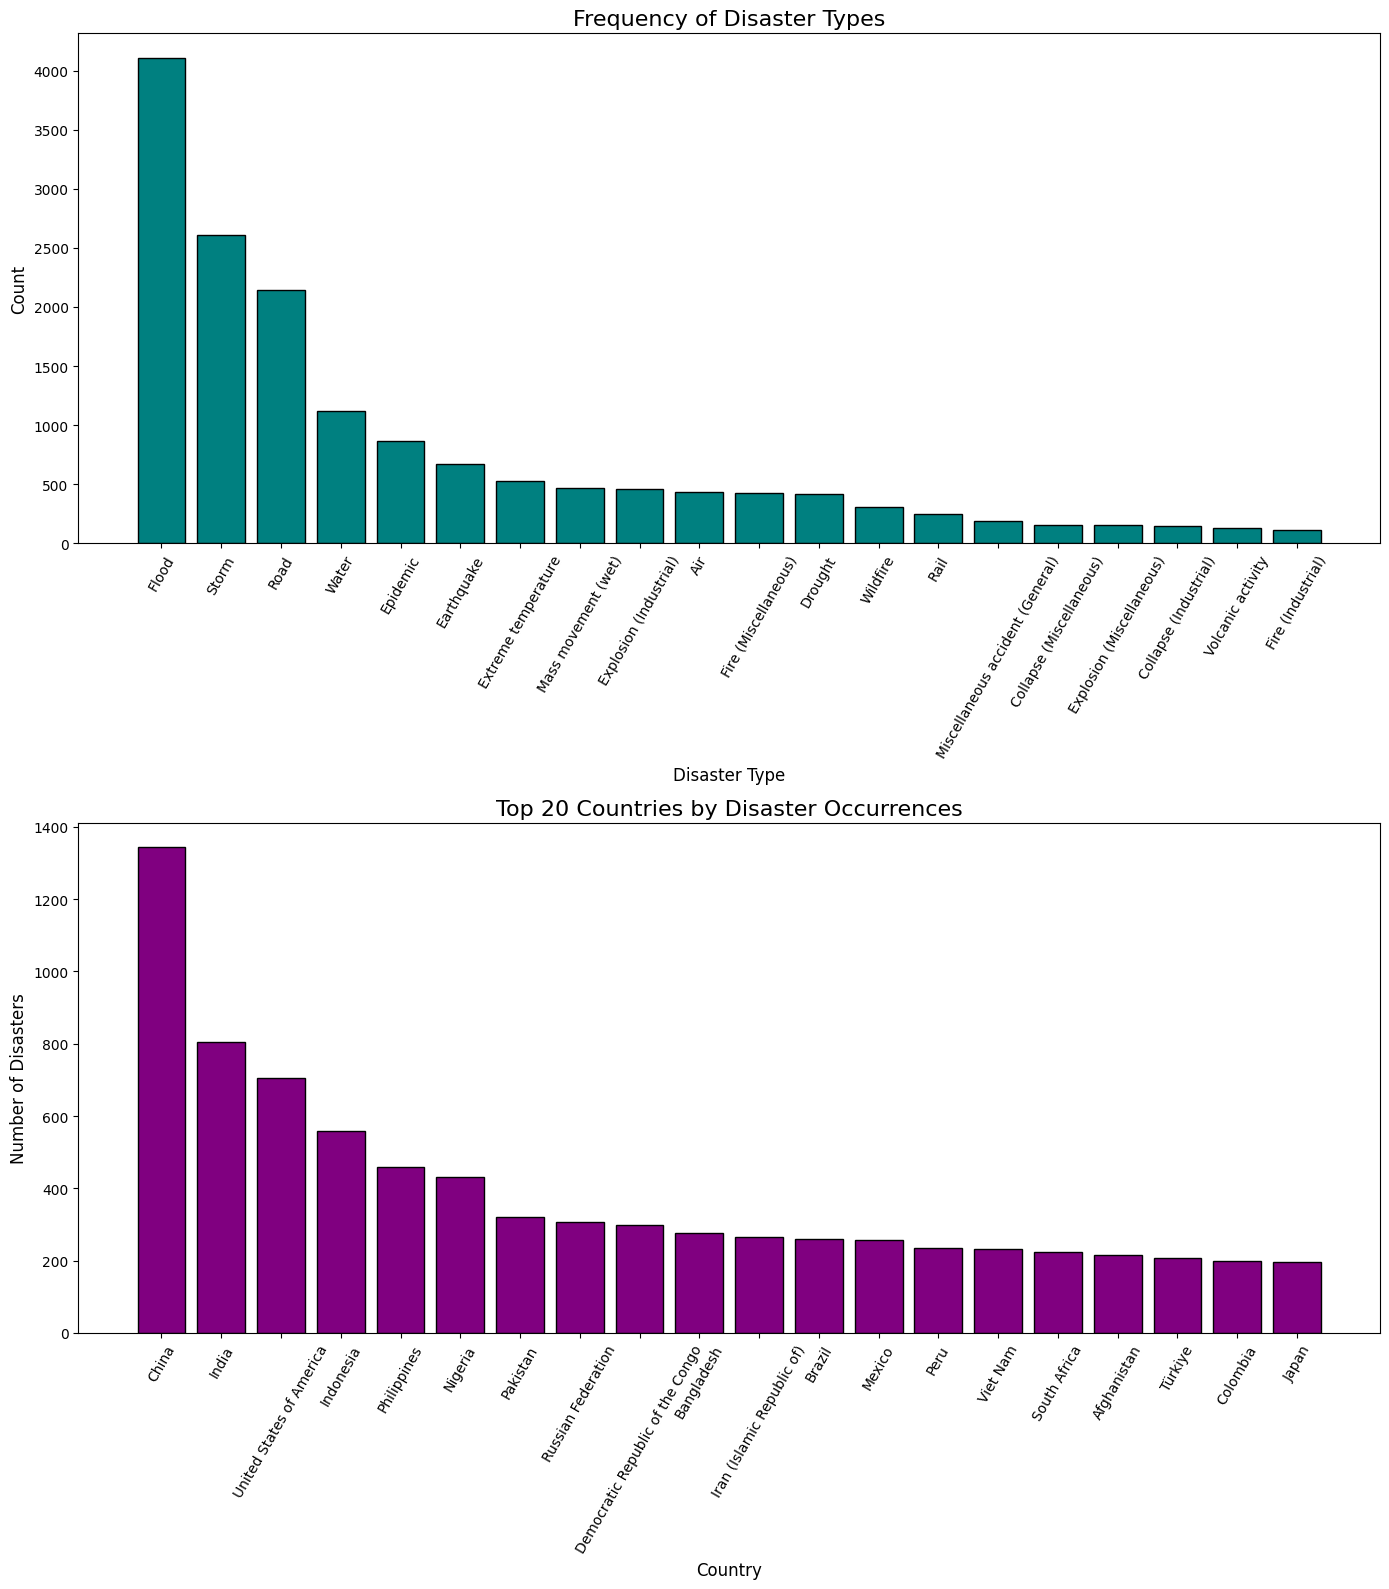

In [7]:
# Plots: Frequency of Each Disaster Type Over Time &  Disaster Occurrences by Country

# Get the top countries and the disaster count by type
disaster_counts = data['Disaster Type'].value_counts().head(20)
disaster_countries = data['Country'].value_counts().head(20)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Plot 1: Frequency of Each Disaster Type
axes[0].bar(disaster_counts.index, disaster_counts.values, color='teal', edgecolor='black')
axes[0].set_title('Frequency of Disaster Types', fontsize=16)
axes[0].set_xlabel('Disaster Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=60, labelsize=10)

# Plot 2: Disaster Occurrences by Country
axes[1].bar(disaster_countries.index, disaster_countries.values, color='purple', edgecolor='black')
axes[1].set_title('Top 20 Countries by Disaster Occurrences', fontsize=16)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Number of Disasters', fontsize=12)
axes[1].tick_params(axis='x', rotation=60, labelsize=10)

# Show plots
plt.tight_layout()
plt.show()

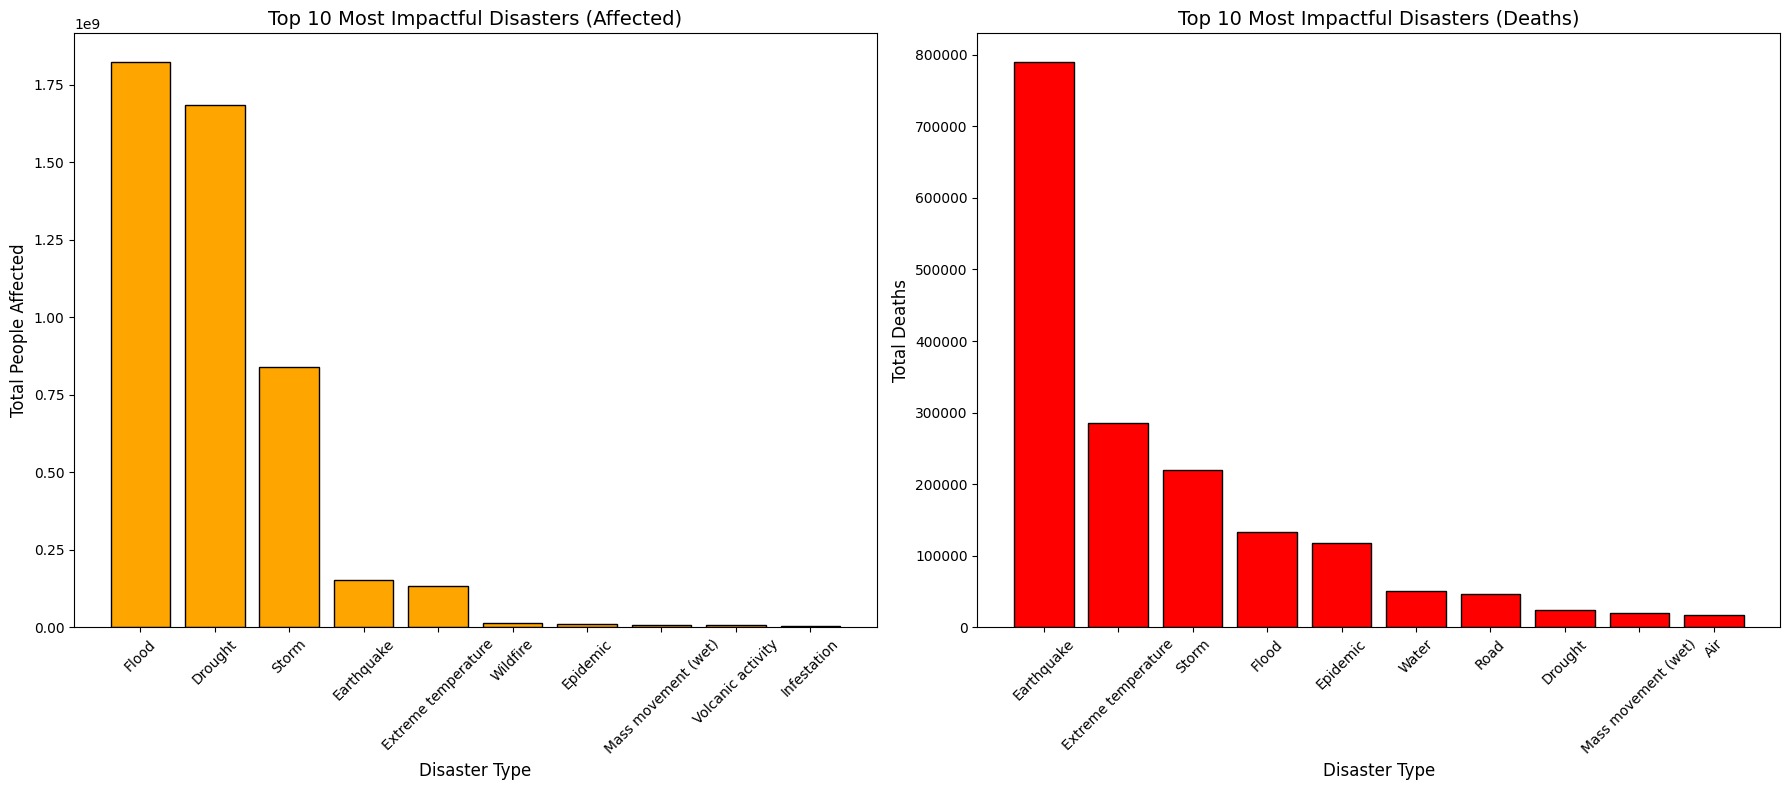

In [8]:
# Plots:  Top 10 Most Impactful Disasters by Total Damages or Total Deaths

# Aggregate by Disaster Type for both damages and deaths
impact_affected = data.groupby('Disaster Type')['Total Affected'].sum().sort_values(ascending=False).head(10)
impact_deaths = data.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Total Affected
axes[0].bar(impact_affected.index, impact_affected.values, color='orange', edgecolor='black')
axes[0].set_title('Top 10 Most Impactful Disasters (Affected)', fontsize=14)
axes[0].set_xlabel('Disaster Type', fontsize=12)
axes[0].set_ylabel('Total People Affected', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot for Total Deaths
axes[1].bar(impact_deaths.index, impact_deaths.values, color='red', edgecolor='black')
axes[1].set_title('Top 10 Most Impactful Disasters (Deaths)', fontsize=14)
axes[1].set_xlabel('Disaster Type', fontsize=12)
axes[1].set_ylabel('Total Deaths', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


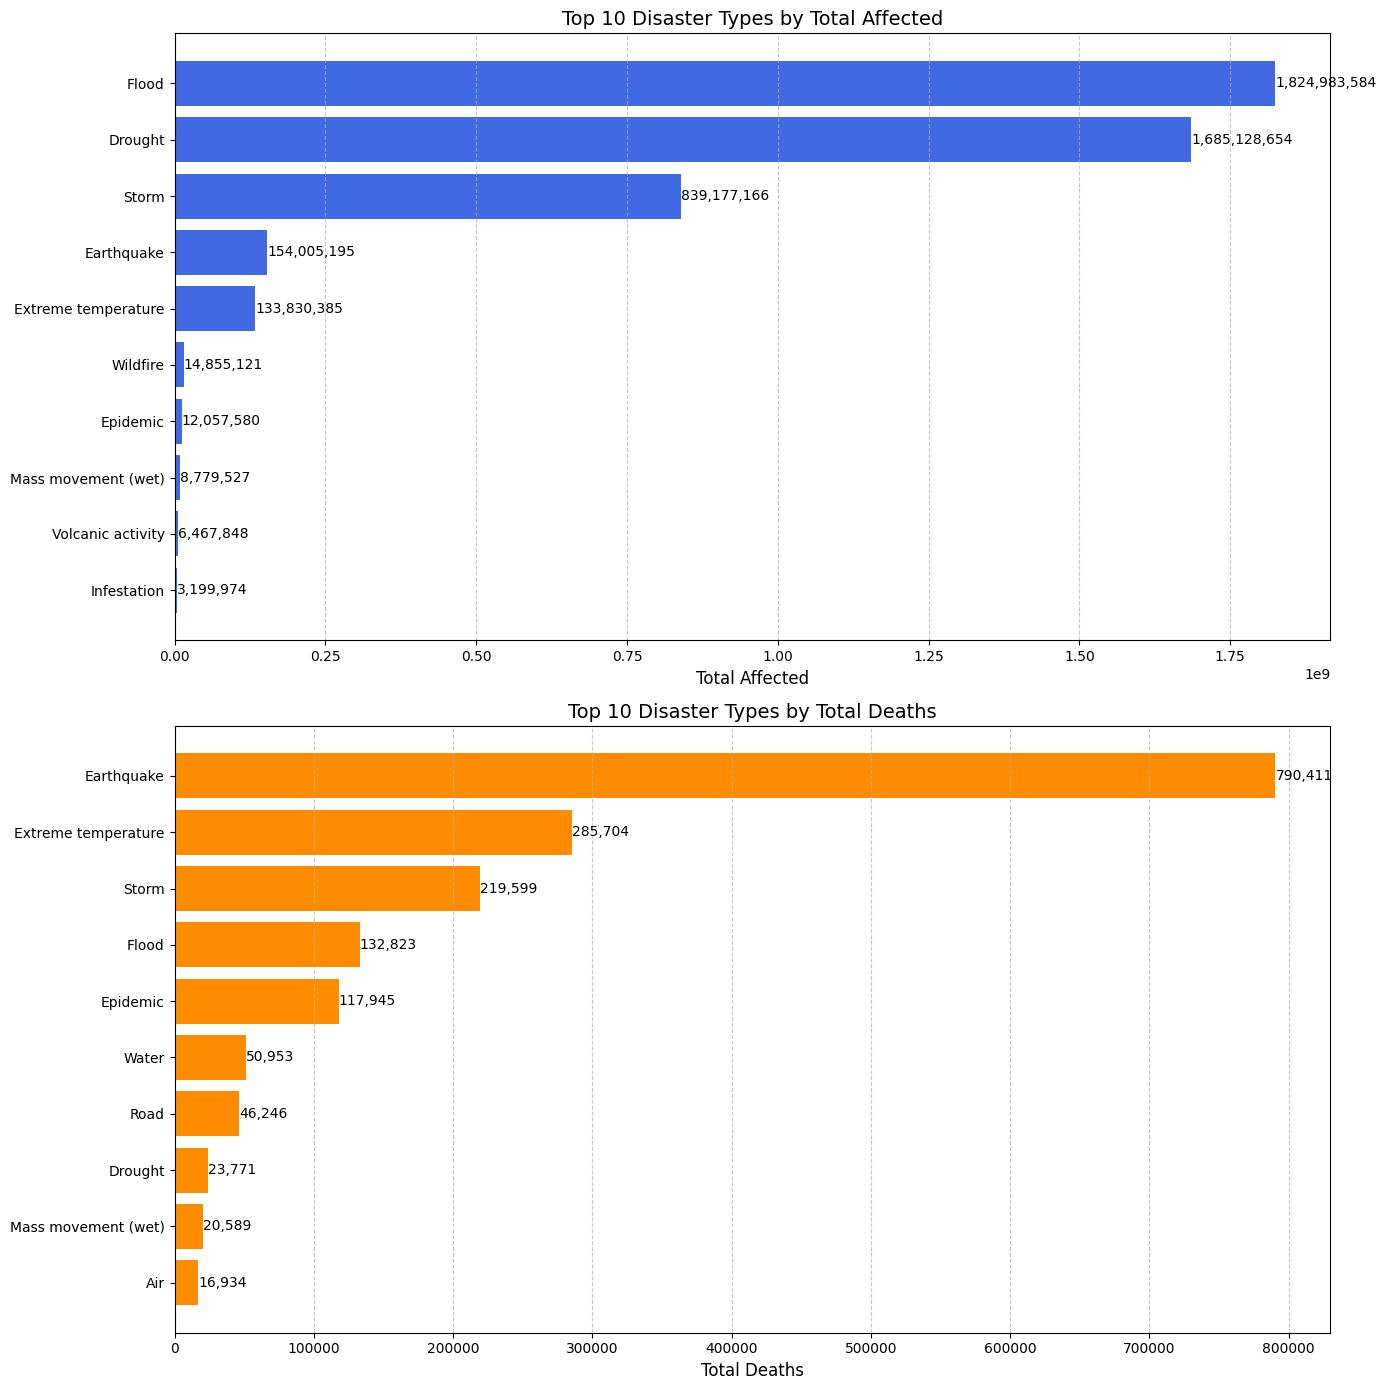

In [9]:
# Plots: Top 10 Disaster Types by Total Affected & Deaths

# Group by Disaster Type and sum the metric values
grouped_affected = data.groupby('Disaster Type')['Total Affected'].sum().reset_index()
grouped_deaths = data.groupby('Disaster Type')['Total Deaths'].sum().reset_index()

# Sort the grouped DataFrames and select the top 10 with the most deaths & affected
top_10_affected = grouped_affected.nlargest(10, 'Total Affected')
top_10_deaths = grouped_deaths.nlargest(10, 'Total Deaths')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

# Plot for Total Affected
bars1 = axes[0].barh(top_10_affected['Disaster Type'], top_10_affected['Total Affected'], color='royalblue')
axes[0].set_title("Top 10 Disaster Types by Total Affected", fontsize=14)
axes[0].set_xlabel('Total Affected', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars1:
    axes[0].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=10)

# Plot for Total Deaths
bars2 = axes[1].barh(top_10_deaths['Disaster Type'], top_10_deaths['Total Deaths'], color='darkorange')
axes[1].set_title("Top 10 Disaster Types by Total Deaths", fontsize=14)
axes[1].set_xlabel('Total Deaths', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars2:
    axes[1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=10)

# Show plots
plt.tight_layout()
plt.show()

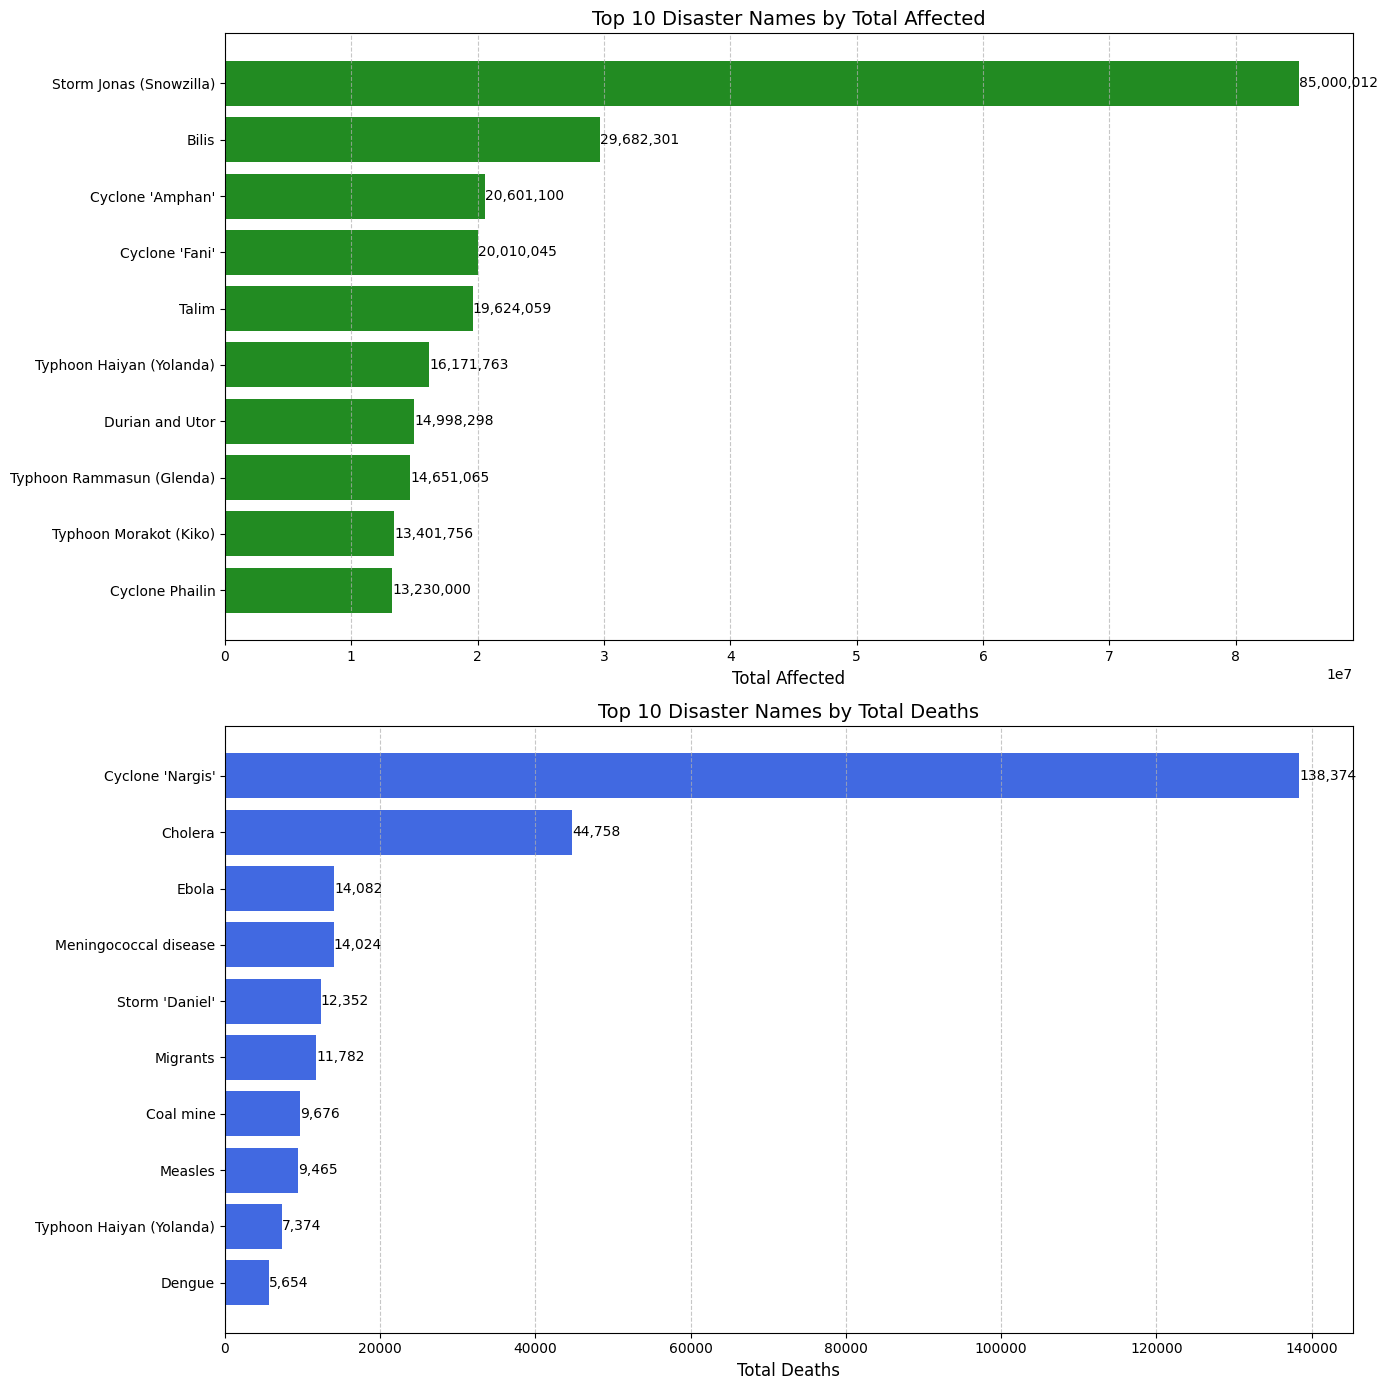

In [10]:
# Plots: Top 10 Disaster Name by Total Affected & Deaths

#Remove the "unknown" from event name 
c_data = data[~data['Event Name'].str.contains('unknown', case=False, na=False)]

# Group by Disaster Type and sum the metric values
grouped_affected = c_data.groupby('Event Name')['Total Affected'].sum().reset_index()
grouped_deaths = c_data.groupby('Event Name')['Total Deaths'].sum().reset_index()

# Sort the grouped DataFrames and select the top 10 with the most deaths & affected
top_10_affected = grouped_affected.nlargest(10, 'Total Affected')
top_10_deaths = grouped_deaths.nlargest(10, 'Total Deaths')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

# Plot for Total Affected
bars1 = axes[0].barh(top_10_affected['Event Name'], top_10_affected['Total Affected'], color='forestgreen')
axes[0].set_title("Top 10 Disaster Names by Total Affected", fontsize=14)
axes[0].set_xlabel('Total Affected', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars1:
    axes[0].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=10)

# Plot for Total Deaths
bars2 = axes[1].barh(top_10_deaths['Event Name'], top_10_deaths['Total Deaths'], color='royalblue')
axes[1].set_title("Top 10 Disaster Names by Total Deaths", fontsize=14)
axes[1].set_xlabel('Total Deaths', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars2:
    axes[1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=10)

# Show plots
plt.tight_layout()
plt.show()

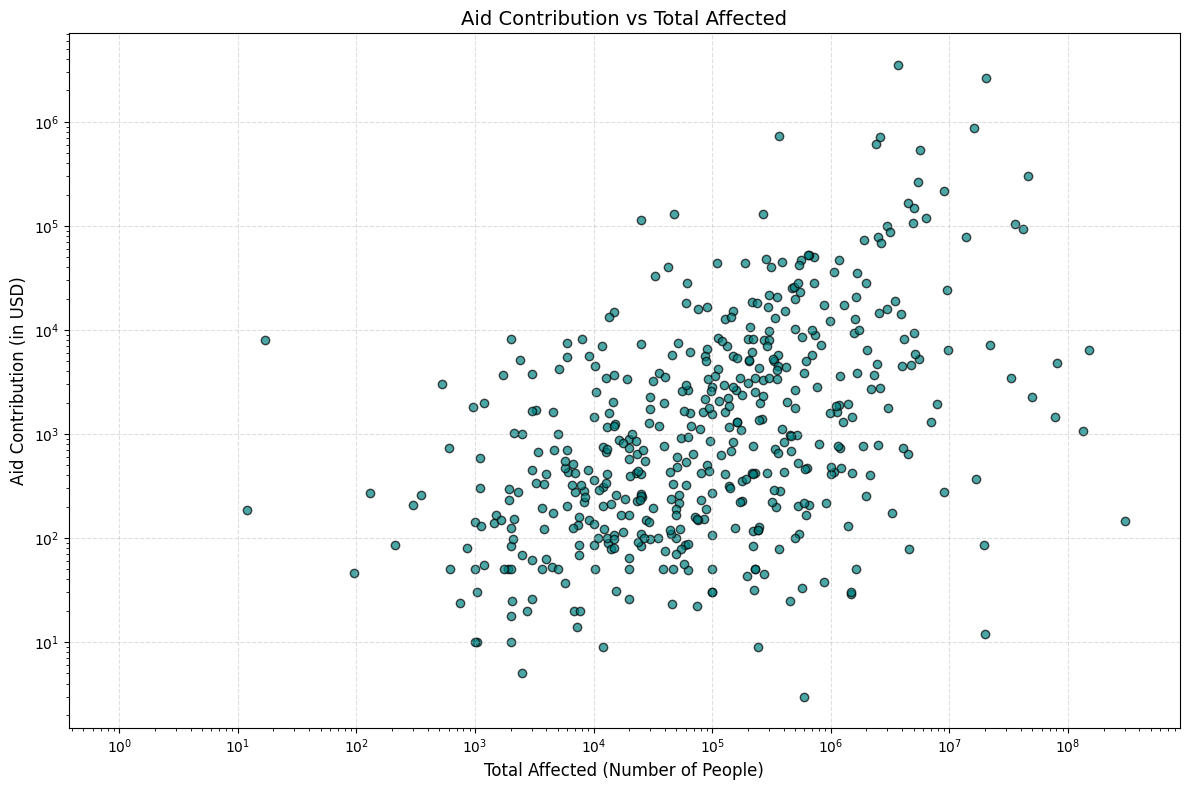

In [11]:
# Plot: Aid contribution by Total affected

# Remove rows with missing data in either column
plot_data = data.dropna(subset=['Total Affected', 'AID Contribution (\'000 US$)'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_data['Total Affected'], plot_data['AID Contribution (\'000 US$)'], alpha=0.7, color='teal', edgecolors='black')

# Set plot title and axis labels
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Aid Contribution (in USD)', fontsize=12)
plt.title('Aid Contribution vs Total Affected', fontsize=14)
plt.grid(alpha=0.4, linestyle='--')

# Adjust log scale for better visualization
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.show()

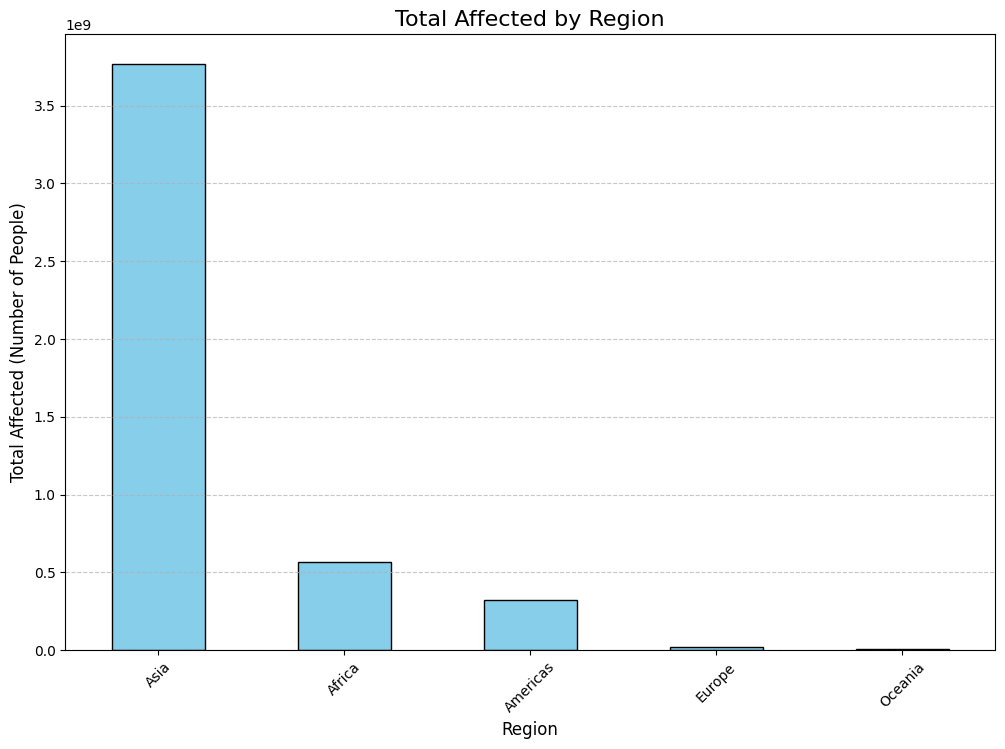

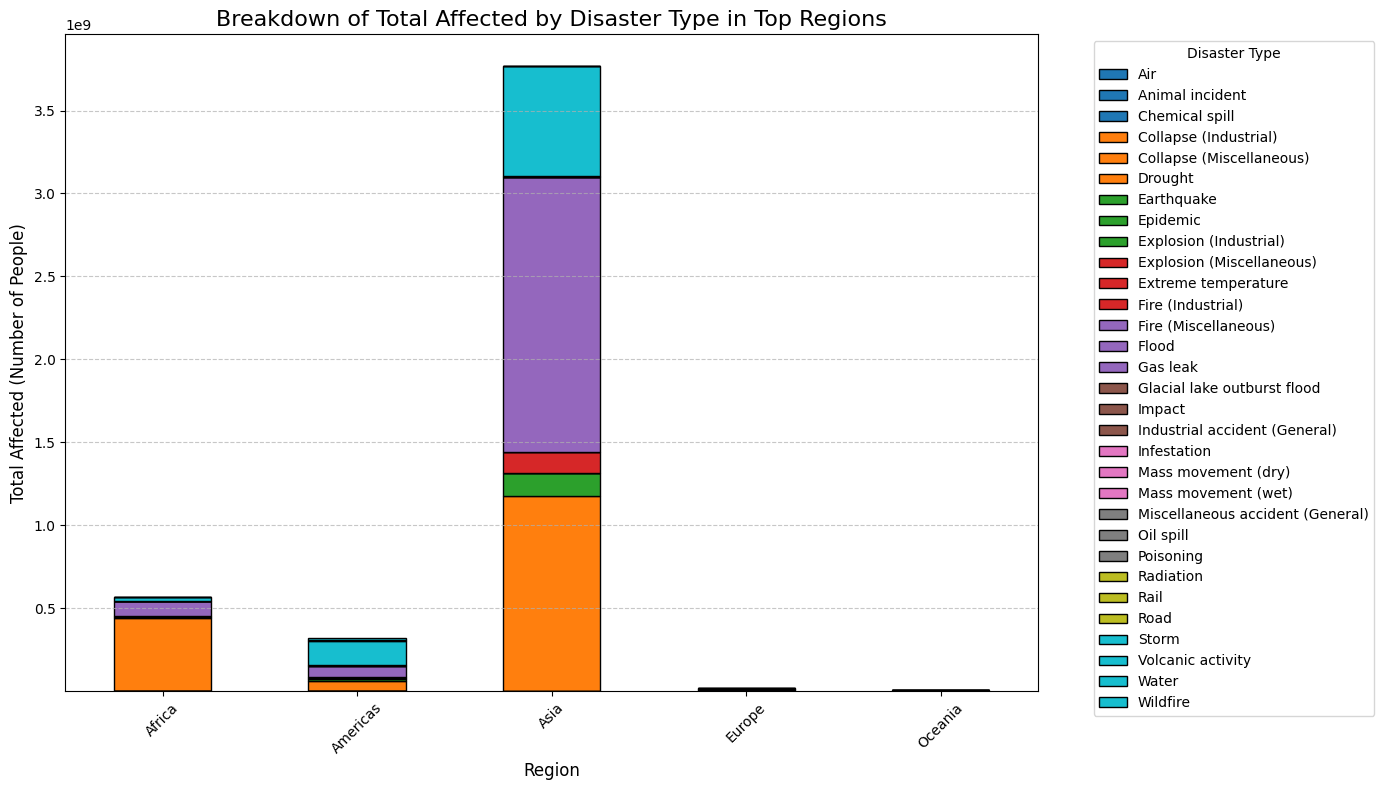

In [13]:
# Plot: Total Affected by Region & Breakdown

# Aggregate data by Region or Country and Disaster Type
geo_data = data.groupby(['Region', 'Disaster Type'], as_index=False)['Total Affected'].sum()

# Get the top 10 most affected regions for better visualization
top_regions = geo_data.groupby('Region')['Total Affected'].sum().nlargest(10).index
filtered_geo_data = geo_data[geo_data['Region'].isin(top_regions)]

# Plot 1: Total Affected by Region
region_data = filtered_geo_data.groupby('Region')['Total Affected'].sum()
plt.figure(figsize=(12, 8))
region_data.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Affected by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Affected (Number of People)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Breakdown by Disaster Type for Top Regions
disaster_data = filtered_geo_data.groupby(['Region', 'Disaster Type'])['Total Affected'].sum().unstack()
disaster_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10', edgecolor='black')
plt.title('Breakdown of Total Affected by Disaster Type in Top Regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Affected (Number of People)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plots
plt.tight_layout()
plt.show()

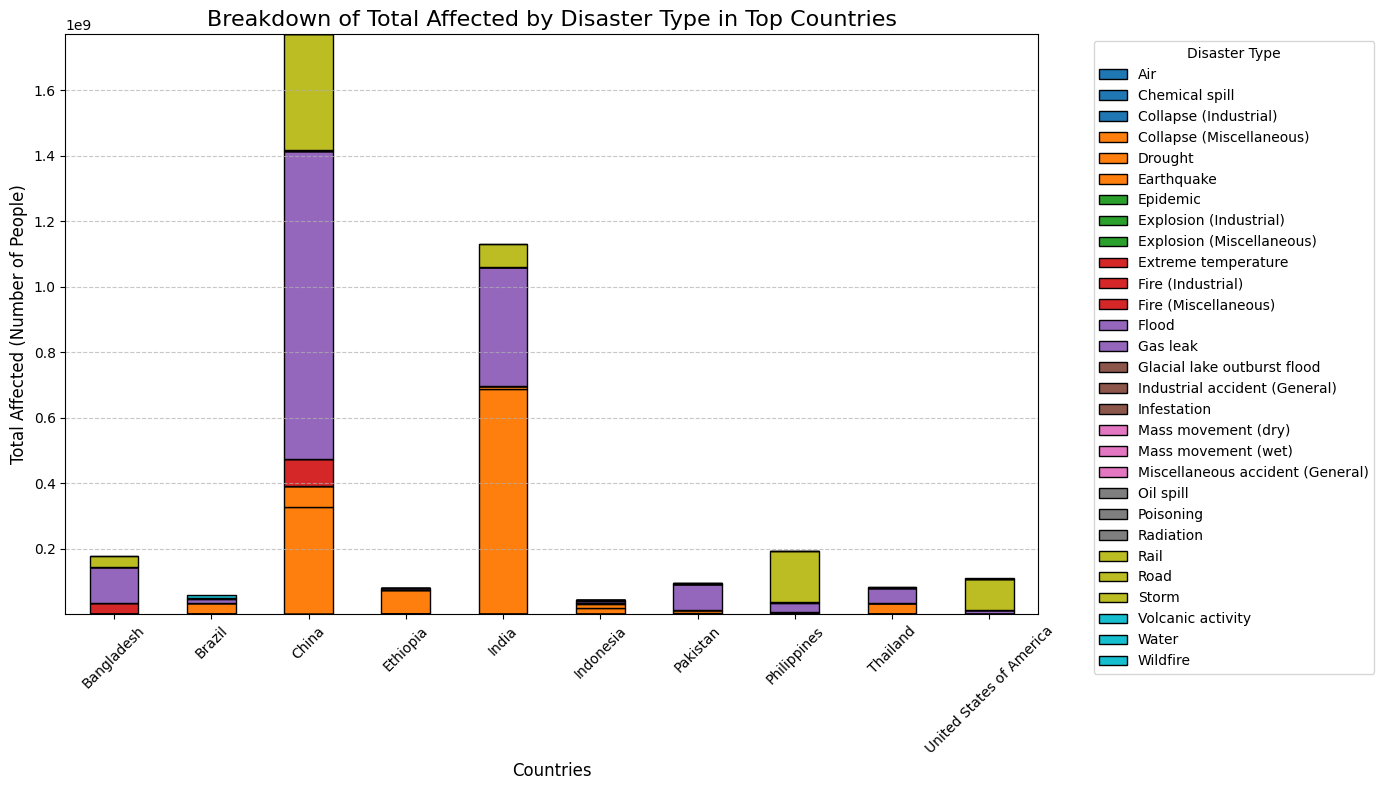

In [14]:
# Plot: Top 10 Countries Breakdown

# Aggregate data by Region or Country and Disaster Type
geo_data = data.groupby(['Country', 'Disaster Type'], as_index=False)['Total Affected'].sum()

# Get the top 10 most affected regions for better visualization
top_regions = geo_data.groupby('Country')['Total Affected'].sum().nlargest(10).index
filtered_geo_data = geo_data[geo_data['Country'].isin(top_regions)]

# Breakdown by Disaster Type for Top Regions
disaster_data = filtered_geo_data.groupby(['Country', 'Disaster Type'])['Total Affected'].sum().unstack()
disaster_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10', edgecolor='black')
plt.title('Breakdown of Total Affected by Disaster Type in Top Countries', fontsize=16)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Total Affected (Number of People)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()

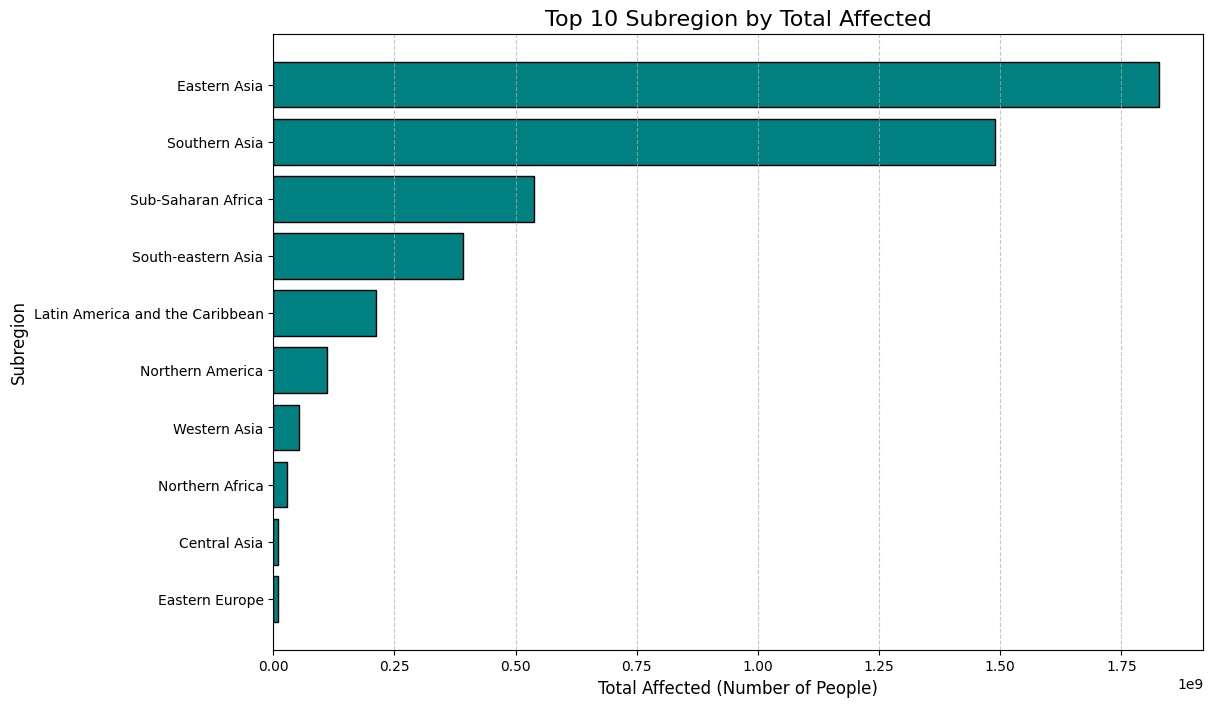

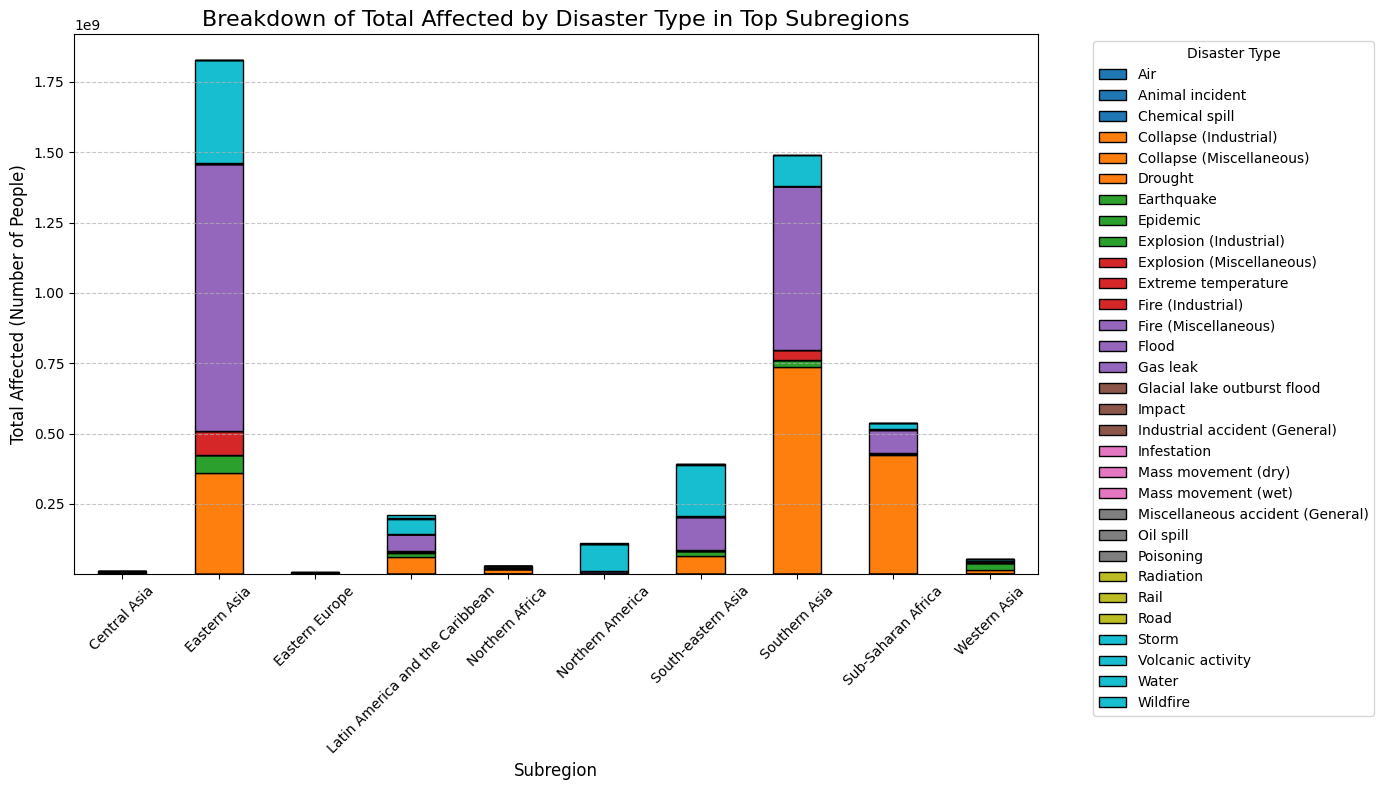

In [15]:
# Plot: Total Affected by Subregion & breakdown

# Get the subregion data
subregion_data = data.groupby('Subregion', as_index=False)['Total Affected'].sum()

# plot 1: affected subregions
plt.figure(figsize=(12, 8))
# get the top 10 largest affected subregions
top_subregion = subregion_data.nlargest(10, 'Total Affected')
# Label plot
plt.barh(top_subregion['Subregion'], top_subregion['Total Affected'], color='teal', edgecolor='black')
plt.title('Top 10 Subregion by Total Affected', fontsize=16)
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Subregion', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest bar on top
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Plot 2: breakdown by subregion 

# Aggregate data by subregion and Disaster Type
geo_data = data.groupby(['Subregion', 'Disaster Type'], as_index=False)['Total Affected'].sum()

# Get the top 10 most affected subregions for better visualization
top_regions = geo_data.groupby('Subregion')['Total Affected'].sum().nlargest(10).index
filtered_geo_data = geo_data[geo_data['Subregion'].isin(top_regions)]

# Plot 2: Breakdown by Disaster Type for Top Regions
disaster_data = filtered_geo_data.groupby(['Subregion', 'Disaster Type'])['Total Affected'].sum().unstack()
disaster_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10', edgecolor='black')
plt.title('Breakdown of Total Affected by Disaster Type in Top Subregions', fontsize=16)
plt.xlabel('Subregion', fontsize=12)
plt.ylabel('Total Affected (Number of People)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

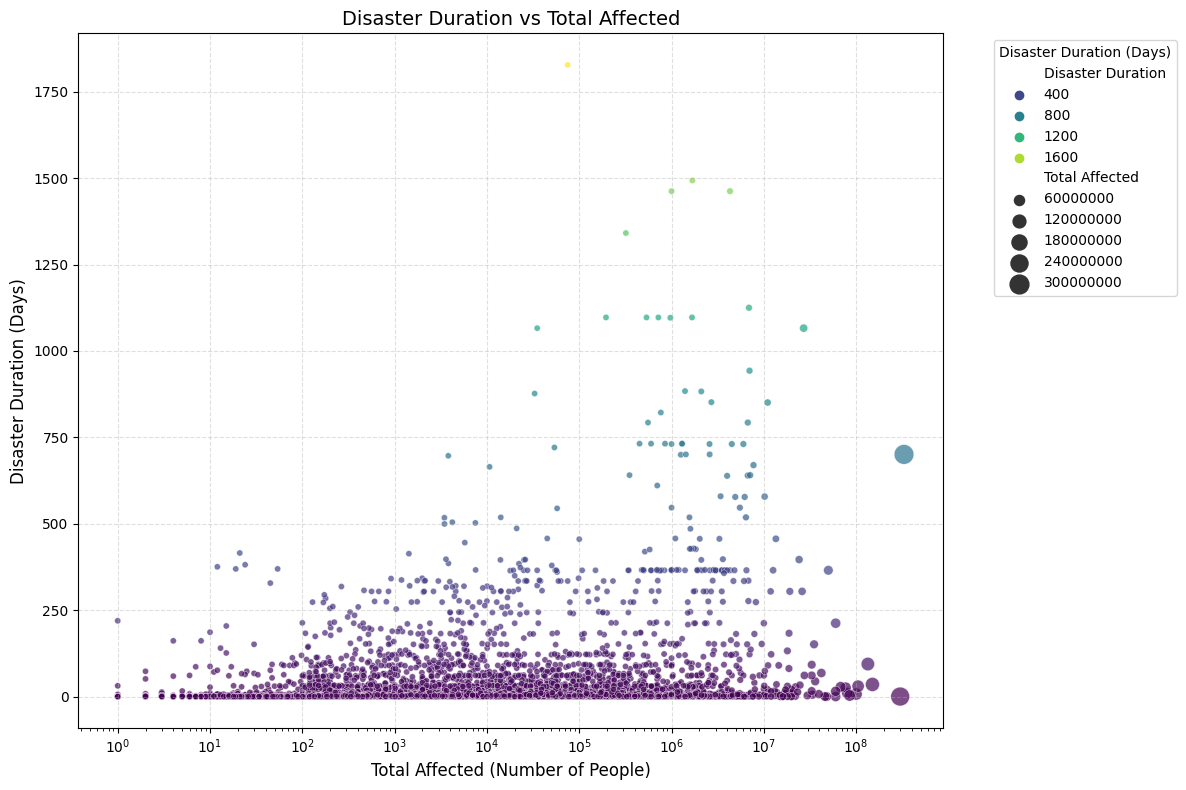

In [16]:
# Scatter Plot: Population Affected vs. Disaster Duration

# Drop the rows from Total Affected that have a -1 
data_c = data[(data['Total Affected'] > 0)]

# Remove rows with missing data in either column
plot_data = data_c.dropna(subset=['Total Affected', 'Disaster Duration'])

# Creating an enhanced scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['Total Affected'],
    y=data['Disaster Duration'],
    hue='Disaster Duration',  # Differentiating by disaster duration
    size='Total Affected',  # Scaling points by affected population
    data=plot_data,
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)

# Add labels
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Disaster Duration (Days)', fontsize=12)
plt.title('Disaster Duration vs Total Affected', fontsize=14)
plt.grid(alpha=0.4, linestyle='--')
plt.xscale('log')  # Log scale for better visibility of data spread

# Show legend
plt.legend(title='Disaster Duration (Days)', bbox_to_anchor=(1.05, 1), loc='upper left')

# show plot
plt.tight_layout()
plt.show()

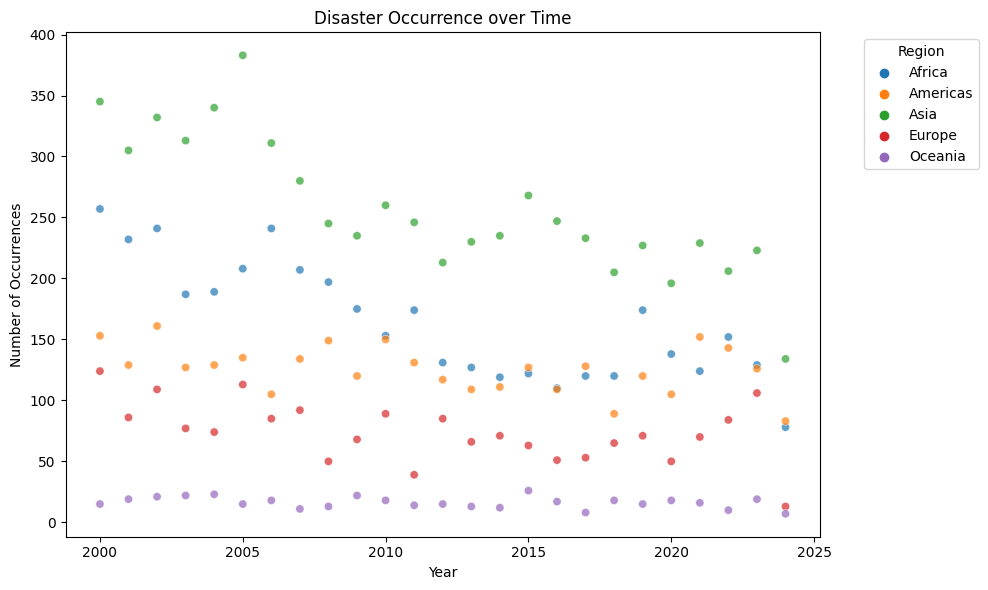

In [17]:
# Scatter Plot: Disaster Occurrence over Time

# Calculate disaster count per year and region (if not already present)
disaster_count_data = data.groupby(['Start Year', 'Region']).size().reset_index(name='Disaster Count')

# Rename 'Start Year' to 'Year' for consistency in the plot
disaster_count_data.rename(columns={'Start Year': 'Year'}, inplace=True)

# Scatter Plot: Disaster Occurrence over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=disaster_count_data,
    x="Year",
    y="Disaster Count",
    hue="Region",
    alpha=0.7
)

# Add labels
plt.title("Disaster Occurrence over Time")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

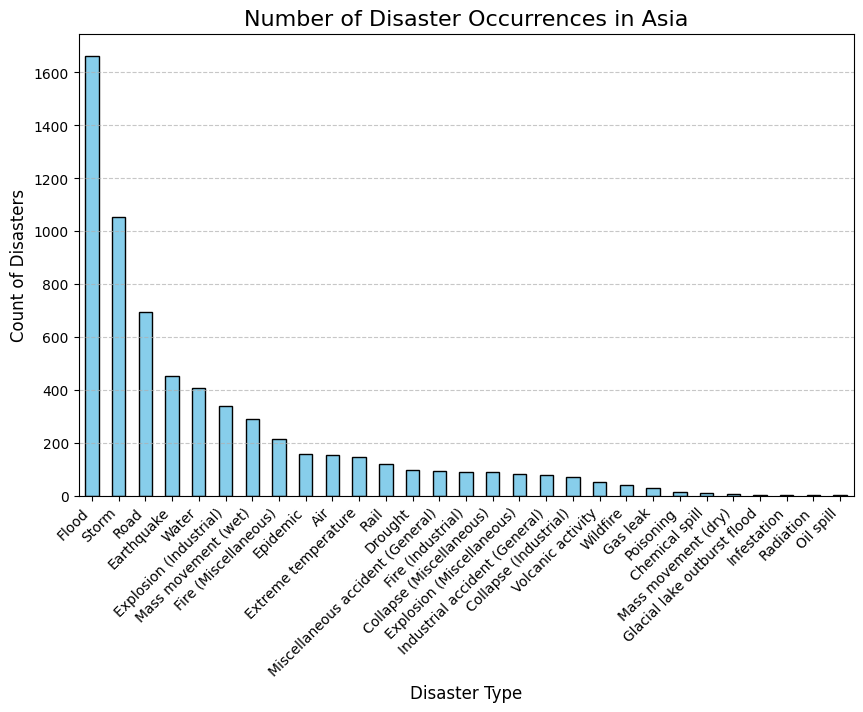

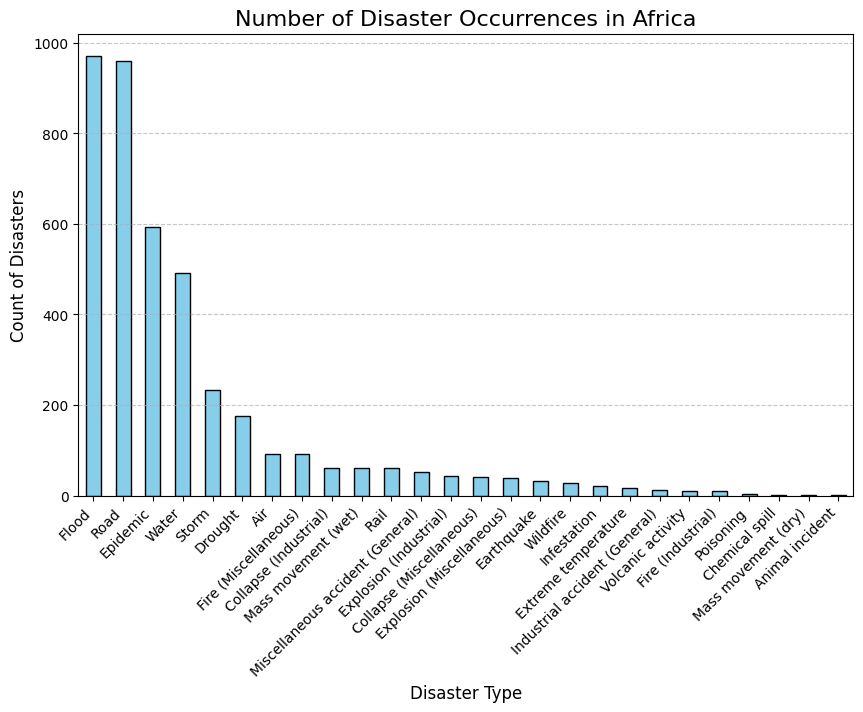

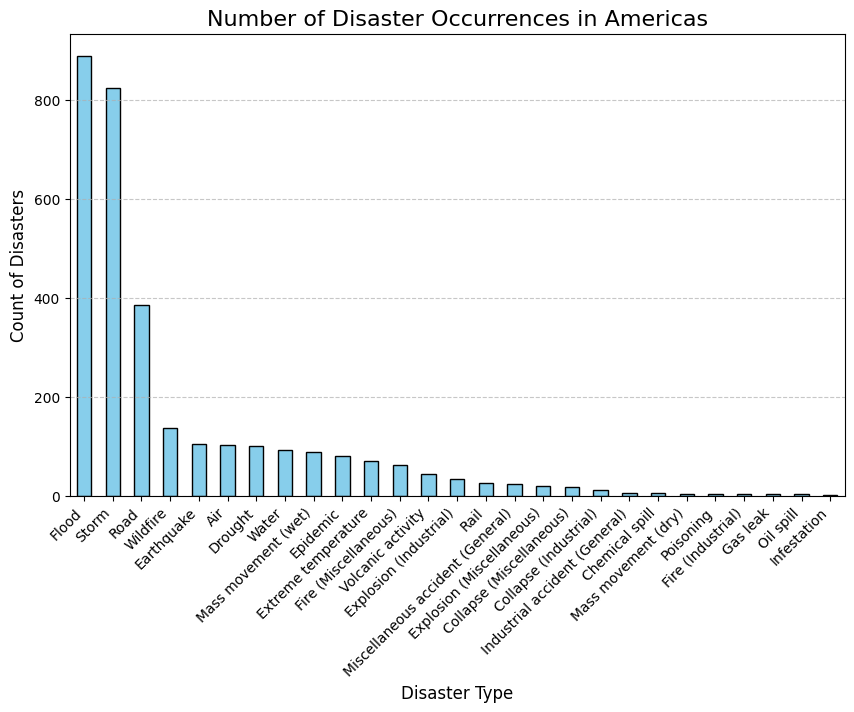

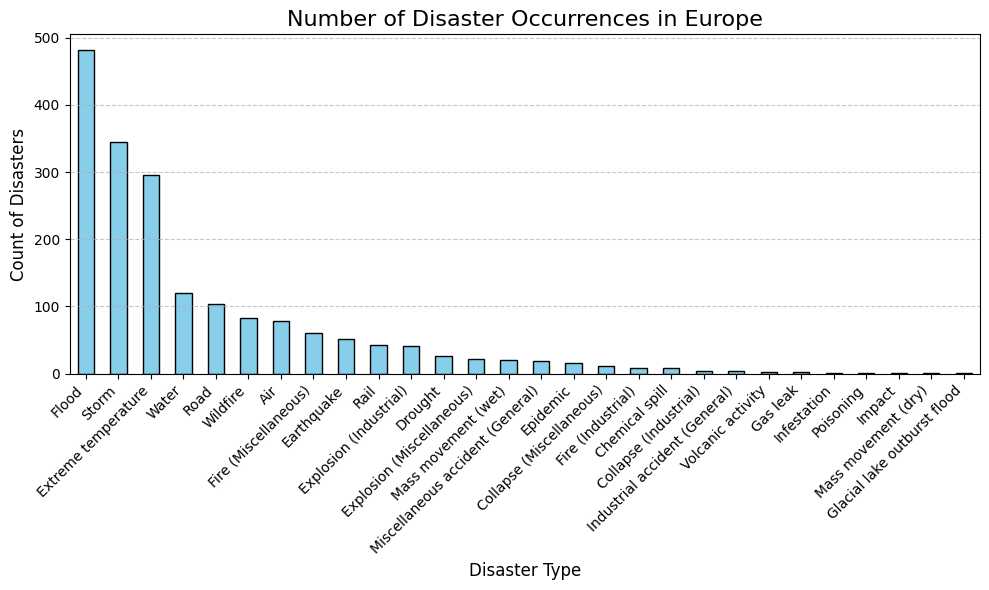

In [39]:
# Plots: Number of disaster types per region

# Define the regions to plot
regions = ['Asia', 'Africa', 'Americas', 'Europe']

for region in regions:
    # Filter data for the current region
    region_data = data[data['Region'] == region]

    # Count the number of occurrences of each disaster type
    disaster_counts = region_data['Disaster Type'].value_counts()

    # Create a bar plot for disaster counts in Asia
    plt.figure(figsize=(10, 6))
    disaster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    # Add titles and labels
    plt.title(f'Number of Disaster Occurrences in {region}', fontsize=16)
    plt.xlabel('Disaster Type', fontsize=12)
    plt.ylabel('Count of Disasters', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show plot
plt.tight_layout()
plt.show()

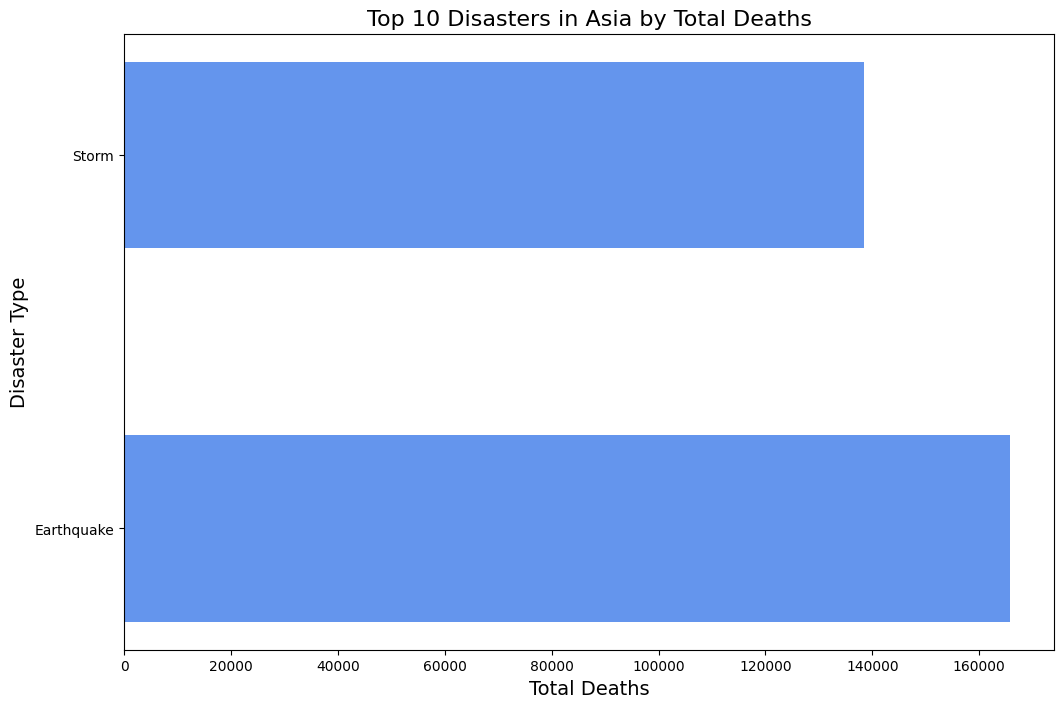

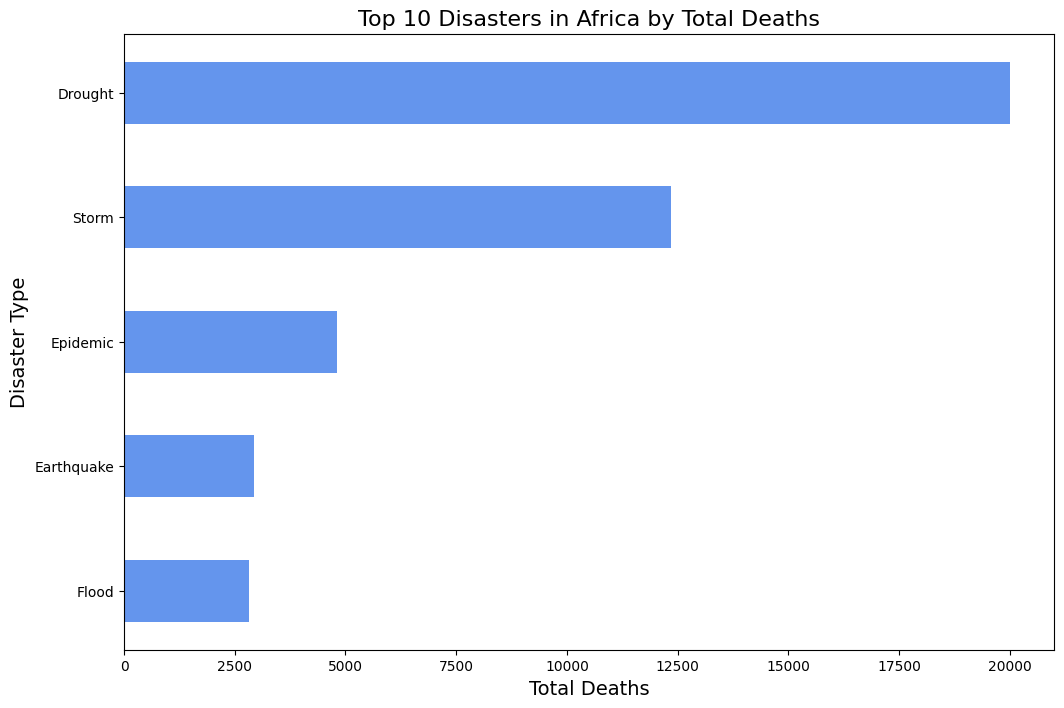

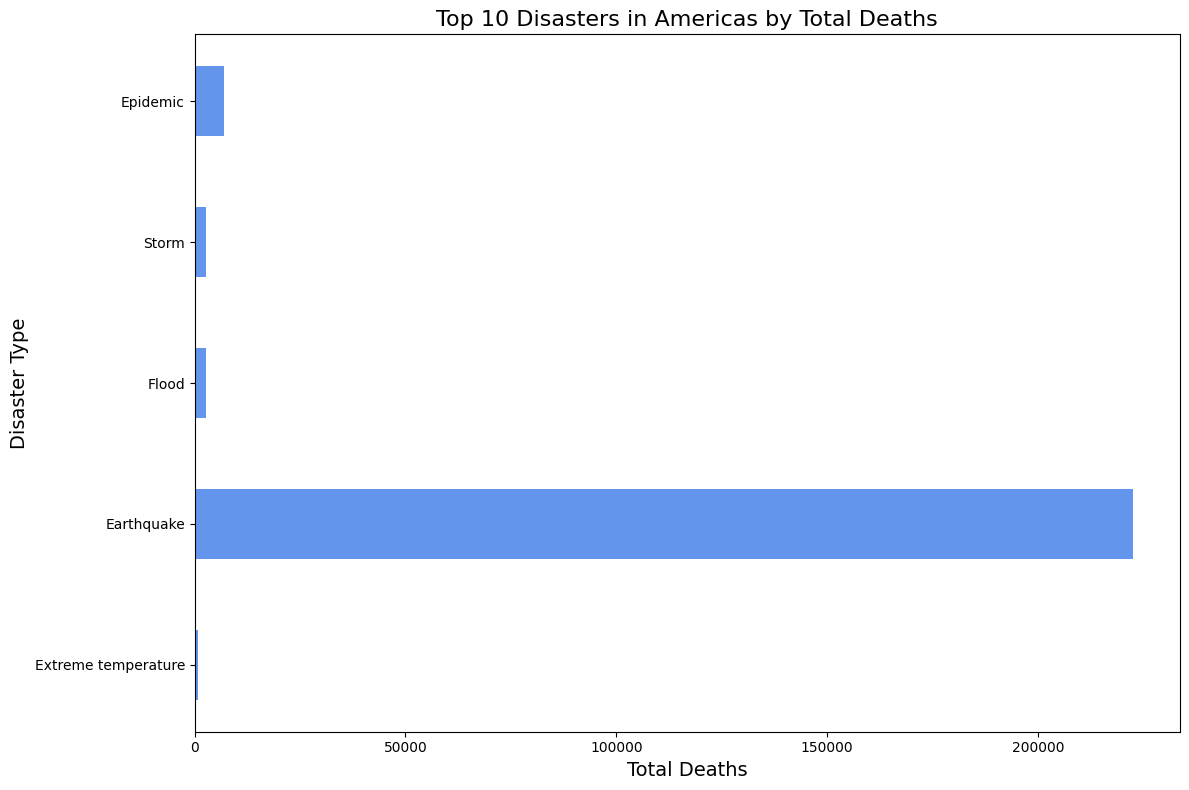

In [38]:
# Plot: Top 10 disasters by specific Region

# Define regions
regions = ['Asia', 'Africa', 'Americas']

for region in regions:
    # Filter data for the current region and get the top 10 disasters by Total Deaths
    region_data = data[data['Region'] == region].nlargest(10, 'Total Deaths')

    # Sort disasters by Total Deaths for better visualization
    region_data = region_data.sort_values(by='Total Deaths', ascending=True)

    # Bar Plot for the region
    plt.figure(figsize=(12, 8))  # Increased figure size
    bars = plt.barh(
        region_data['Disaster Type'], 
        region_data['Total Deaths'], 
        color='cornflowerblue', 
        height=0.5  # Reduce the height of the bars to make them thinner
    )

    # Add title and labels
    plt.title(f'Top 10 Disasters in {region} by Total Deaths', fontsize=16)
    plt.xlabel('Total Deaths', fontsize=14)
    plt.ylabel('Disaster Type', fontsize=14)

# show plot
plt.tight_layout()
plt.show()
